<a href="https://colab.research.google.com/github/jai2shan/TSAI-EVA40-Assignments/blob/master/Session%209/Assignment_9_Step%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install asgnmt9-0.0.5-py3-none-any.whl


## Updates in this trial

> Changing the learning rate to 0.1

In [2]:
from torchvision import transforms
from asgnmt9.DataLoader import cifar_data_loader,View_images
transform_params = dict()
transform_params['train'] = transforms.Compose([transforms.RandomHorizontalFlip(),
                                      #  transforms.Grayscale(num_output_channels=3), 
                                      #  transforms.RandomCrop(32, padding=4),  
                                       transforms.RandomRotation(10),
                                       transforms.RandomHorizontalFlip(),
                                      #  transforms.RandomVerticalFlip(),  
                                       transforms.RandomAffine(0,shear=10,scale=(0.8,1.2)),  
                                       transforms.ColorJitter(brightness=0.2,contrast=0.2,saturation=0.2),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))])

transform_params['test'] = transforms.Compose([# transforms.RandomHorizontalFlip(),
                                      #  transforms.Grayscale(num_output_channels=3), 
                                      #  transforms.RandomCrop(32, padding=4),  
                                      #  transforms.RandomRotation(10),  
                                      #  transforms.RandomAffine(0,shear=10,scale=(0.8,1.2)),  
                                      #  transforms.ColorJitter(brightness=0.2,contrast=0.2,saturation=0.2),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))])


classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

trainloader,testloader = cifar_data_loader(transform_params,BatchSize=250)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
import torch

from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

from asgnmt9.resnet import ResNet18
net = ResNet18().to(device)
summary(net, input_size=(3,32,32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [4]:
from asgnmt9.Training_Testing import TrainTest
import torch.optim as optim
import torch.nn as nn
from torch.optim.lr_scheduler import StepLR

tt = TrainTest()
test_acc = 0
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9,weight_decay = 0.00005)
scheduler = StepLR(optimizer, step_size=20, gamma=0.1)

for epoch in range(30):
    print("EPOCH:", epoch)
    tt.train_(net, device, trainloader, optimizer, criterion, epoch,L1 = False)
    scheduler.step()
    acc = tt.test_(net, device, testloader)  
    
   
print('Finished Training')

  0%|          | 0/200 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.5967196226119995 Batch_id=199 Accuracy=28.36: 100%|██████████| 200/200 [00:36<00:00,  5.45it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -2.0364, Accuracy: 4160/10000 (41.60%)

EPOCH: 1


Loss=1.3776851892471313 Batch_id=199 Accuracy=44.18: 100%|██████████| 200/200 [00:36<00:00,  5.44it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -2.6674, Accuracy: 4803/10000 (48.03%)

EPOCH: 2


Loss=1.2804442644119263 Batch_id=199 Accuracy=51.46: 100%|██████████| 200/200 [00:36<00:00,  5.46it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -3.5226, Accuracy: 5720/10000 (57.20%)

EPOCH: 3


Loss=1.0792832374572754 Batch_id=199 Accuracy=59.10: 100%|██████████| 200/200 [00:36<00:00,  5.45it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -4.1478, Accuracy: 6156/10000 (61.56%)

EPOCH: 4


Loss=0.9579240679740906 Batch_id=199 Accuracy=64.15: 100%|██████████| 200/200 [00:36<00:00,  5.42it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -4.6694, Accuracy: 6692/10000 (66.92%)

EPOCH: 5


Loss=0.8011636734008789 Batch_id=199 Accuracy=67.80: 100%|██████████| 200/200 [00:36<00:00,  5.43it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -5.1966, Accuracy: 7086/10000 (70.86%)

EPOCH: 6


Loss=0.7875316143035889 Batch_id=199 Accuracy=70.50: 100%|██████████| 200/200 [00:36<00:00,  5.41it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -5.2202, Accuracy: 7269/10000 (72.69%)

EPOCH: 7


Loss=0.657940149307251 Batch_id=199 Accuracy=72.57: 100%|██████████| 200/200 [00:36<00:00,  5.43it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -5.7485, Accuracy: 7425/10000 (74.25%)

EPOCH: 8


Loss=0.7729061841964722 Batch_id=199 Accuracy=74.19: 100%|██████████| 200/200 [00:36<00:00,  5.47it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -6.1903, Accuracy: 7454/10000 (74.54%)

EPOCH: 9


Loss=0.6464795470237732 Batch_id=199 Accuracy=76.27: 100%|██████████| 200/200 [00:36<00:00,  5.44it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -6.7396, Accuracy: 7689/10000 (76.89%)

EPOCH: 10


Loss=0.6375935077667236 Batch_id=199 Accuracy=77.92: 100%|██████████| 200/200 [00:36<00:00,  5.43it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -6.9652, Accuracy: 7669/10000 (76.69%)

EPOCH: 11


Loss=0.6857739090919495 Batch_id=199 Accuracy=79.20: 100%|██████████| 200/200 [00:36<00:00,  5.43it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -6.9404, Accuracy: 7911/10000 (79.11%)

EPOCH: 12


Loss=0.5654058456420898 Batch_id=199 Accuracy=80.88: 100%|██████████| 200/200 [00:36<00:00,  5.44it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -7.2951, Accuracy: 8012/10000 (80.12%)

EPOCH: 13


Loss=0.4698650538921356 Batch_id=199 Accuracy=81.68: 100%|██████████| 200/200 [00:36<00:00,  5.44it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -7.7414, Accuracy: 8149/10000 (81.49%)

EPOCH: 14


Loss=0.5271375179290771 Batch_id=199 Accuracy=82.99: 100%|██████████| 200/200 [00:36<00:00,  5.44it/s]



Test set: Average loss: -8.0908, Accuracy: 8073/10000 (80.73%)

EPOCH: 15


Loss=0.40573105216026306 Batch_id=199 Accuracy=84.04: 100%|██████████| 200/200 [00:36<00:00,  5.48it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -8.5117, Accuracy: 8287/10000 (82.87%)

EPOCH: 16


Loss=0.34039220213890076 Batch_id=199 Accuracy=84.77: 100%|██████████| 200/200 [00:36<00:00,  5.42it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -8.5972, Accuracy: 8297/10000 (82.97%)

EPOCH: 17


Loss=0.4329497516155243 Batch_id=199 Accuracy=85.67: 100%|██████████| 200/200 [00:36<00:00,  5.44it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -8.9429, Accuracy: 8423/10000 (84.23%)

EPOCH: 18


Loss=0.3693666458129883 Batch_id=199 Accuracy=86.39: 100%|██████████| 200/200 [00:36<00:00,  5.43it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -9.3449, Accuracy: 8396/10000 (83.96%)

EPOCH: 19


Loss=0.4357340633869171 Batch_id=199 Accuracy=87.12: 100%|██████████| 200/200 [00:36<00:00,  5.44it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -9.3742, Accuracy: 8479/10000 (84.79%)

EPOCH: 20


Loss=0.2449243664741516 Batch_id=199 Accuracy=91.04: 100%|██████████| 200/200 [00:36<00:00,  5.45it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -11.5049, Accuracy: 8748/10000 (87.48%)

EPOCH: 21


Loss=0.18596795201301575 Batch_id=199 Accuracy=92.07: 100%|██████████| 200/200 [00:37<00:00,  5.40it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -11.9287, Accuracy: 8766/10000 (87.66%)

EPOCH: 22


Loss=0.22228218615055084 Batch_id=199 Accuracy=92.78: 100%|██████████| 200/200 [00:36<00:00,  5.44it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -12.2207, Accuracy: 8772/10000 (87.72%)

EPOCH: 23


Loss=0.18916821479797363 Batch_id=199 Accuracy=93.08: 100%|██████████| 200/200 [00:36<00:00,  5.47it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -12.3564, Accuracy: 8817/10000 (88.17%)

EPOCH: 24


Loss=0.1503479778766632 Batch_id=199 Accuracy=93.39: 100%|██████████| 200/200 [00:36<00:00,  5.48it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -12.3764, Accuracy: 8770/10000 (87.70%)

EPOCH: 25


Loss=0.27770528197288513 Batch_id=199 Accuracy=93.70: 100%|██████████| 200/200 [00:36<00:00,  5.47it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -12.6161, Accuracy: 8797/10000 (87.97%)

EPOCH: 26


Loss=0.16243450343608856 Batch_id=199 Accuracy=93.91: 100%|██████████| 200/200 [00:36<00:00,  5.44it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -12.6593, Accuracy: 8791/10000 (87.91%)

EPOCH: 27


Loss=0.2233496457338333 Batch_id=199 Accuracy=94.33: 100%|██████████| 200/200 [00:36<00:00,  5.49it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -12.8241, Accuracy: 8825/10000 (88.25%)

EPOCH: 28


Loss=0.2006549835205078 Batch_id=199 Accuracy=94.58: 100%|██████████| 200/200 [00:36<00:00,  5.42it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -12.9065, Accuracy: 8777/10000 (87.77%)

EPOCH: 29


Loss=0.13755737245082855 Batch_id=199 Accuracy=94.71: 100%|██████████| 200/200 [00:36<00:00,  5.41it/s]



Test set: Average loss: -13.1613, Accuracy: 8819/10000 (88.19%)

Finished Training


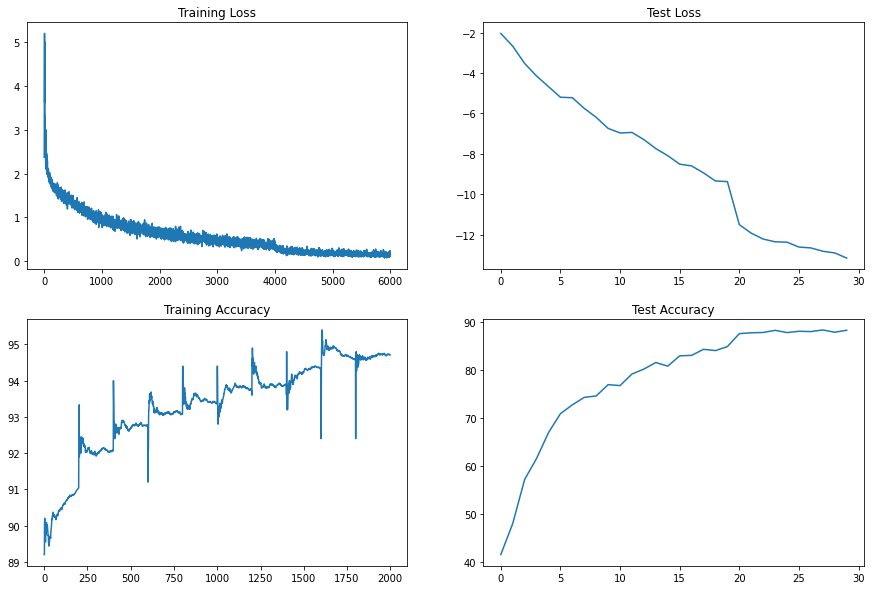

In [5]:
from asgnmt9.ModelPerformance import *

PlotTrainingGraphs(tt)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


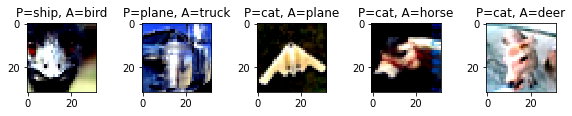

In [6]:
Misclassification(testloader,net,classes,device)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:    cat  ship  ship plane
Predicted:    cat  ship  ship plane
Accuracy of the network on the 10000 test images: 88 %
Accuracy of plane : 100 %
Accuracy of   car : 93 %
Accuracy of  bird : 75 %
Accuracy of   cat : 85 %
Accuracy of  deer : 76 %
Accuracy of   dog : 85 %
Accuracy of  frog : 94 %
Accuracy of horse : 87 %
Accuracy of  ship : 95 %
Accuracy of truck : 93 %


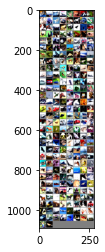

In [7]:
ViewModelPerformance(testloader,net,classes,device)

In [0]:
from asgnmt9.gradcam import GradCamDisplay
import PIL
img_name =['airplane.png','automobile.png','bird.png','cat.png','deer.png']

pil_image = []
for i,img in enumerate(img_name):
   pil_image.append(PIL.Image.open(img))


In [0]:
from asgnmt9.gradcam import *
def GradCamDisplay(model,pil_image,classes,device):
    normed_torch_img = []
    torch_img_list = []

    for i in pil_image:
      torch_img = transforms.Compose([
          transforms.Resize((32, 32)),
          transforms.ToTensor()])(i).to(device)
      torch_img_list.append(torch_img)
      normed_torch_img .append(transforms.Normalize([0.4914, 0.4822, 0.4465], [0.247, 0.243, 0.261])(torch_img)[None])

    def imshow(img,c = "" ):
        #img = img / 2 + 0.5     # unnormalize
        npimg = img.numpy()
        fig = plt.figure(figsize=(10,10))
        plt.imshow(np.transpose(npimg, (1, 2, 0)),interpolation='none')
        plt.title(c)

    for i,k in enumerate(normed_torch_img):
      images1 = [torch_img_list[i].cpu()]
      images2 =  [torch_img_list[i].cpu()]
      b = copy.deepcopy(model.to(device))
      output = model(normed_torch_img[i])
      _, predicted = torch.max(output.data, 1)
      #print(classes[int(predicted)])
      layers =  [b.layer1,b.layer2,b.layer3,b.layer4]
      
      for j in layers:
        g = GradCAM(b,j)
        mask, _= g(normed_torch_img[i])
        heatmap, result = visualize_cam(mask,torch_img_list[i] )
        images1.extend([heatmap])
        images2.extend([result])

      grid_image = make_grid(images1+images2,nrow=5)
      imshow(grid_image,c = classes[int(predicted)])


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2796: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


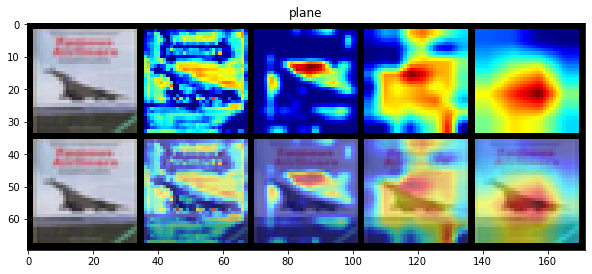

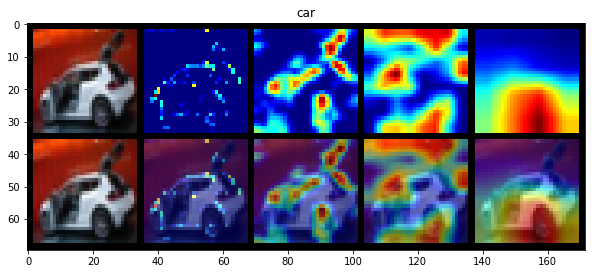

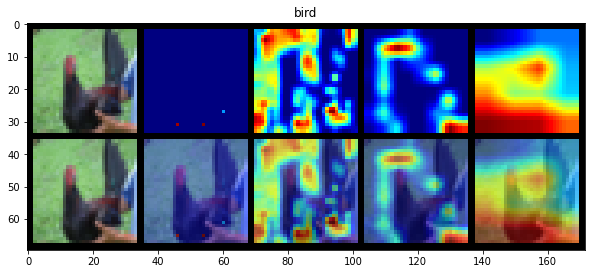

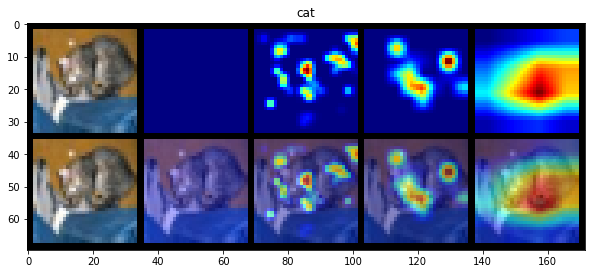

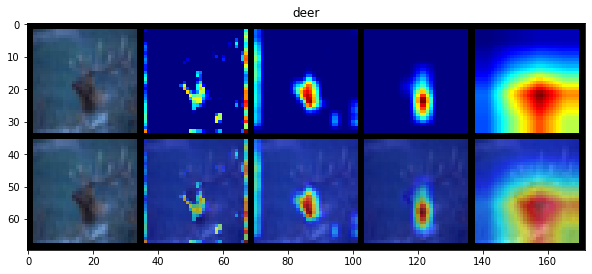

In [10]:
import copy
GradCamDisplay(net,pil_image,classes,device)